<a href="https://colab.research.google.com/github/7md2007/MyWork/blob/Colab/Pedastrians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Hamad Mohammed Aljenibi
School ID: 2013150794
EID: 784200780964100
Class: 11/CAI


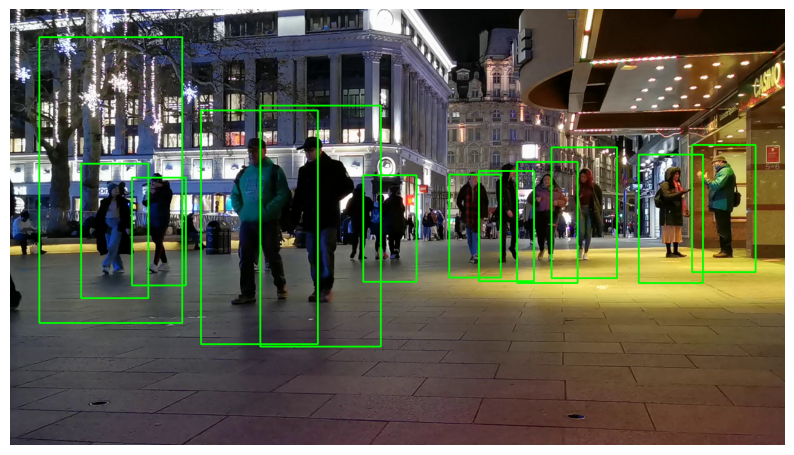

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the video file path (upload 'people.mp4' to the Colab session)
video_path = 'People.mp4'

# Initialize the video capture object
cap = cv2.VideoCapture(video_path)

# Check if video file opened successfully
if not cap.isOpened():
  print(f"Error: Unable to open video file {video_path}")
  exit()

# Create HOG descriptor and initialize it with the pre-trained pedestrian detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Function to display a frame using matplotlib
def display_frame(frame):
    # Convert the frame from BGR (OpenCV format) to RGB (matplotlib format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# Loop through each frame in the video
while True:
    # Read the current frame
    ret, frame = cap.read()

    # Check if frame was read successfully
    if not ret:
        print("Reached the end of the video or an error occurred.")
        break

    # Detect pedestrians in the current frame
    (rects, weights) = hog.detectMultiScale(
        frame,
        winStride=(8, 8),
        padding=(8, 8),
        scale=1.05
    )

    # Draw bounding boxes around detected pedestrians
    for (x, y, w, h) in rects:
      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame with bounding boxes using matplotlib
    display_frame(frame)

    # You can add a pause if you want to control the playback speed:
    # time.sleep(0.1)

    # Remove the following line if you want to see more frames
    break  # Break loop after displaying one frame (for demonstration purposes)

# Release the video capture object
cap.release()
